<a href="https://colab.research.google.com/github/sunnyday2/flight_on_time/blob/desarrollo/Alex_flight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data set Kagge de Alex



## Cargar entorno de Kaggle

In [ ]:
# -*- coding: utf-8 -*-
"""Alex colab (1).ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1j4ULTky6RJWidjbq4WzodILtIt20V50L
"""

## Obtener la información sobre el data set

In [2]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("giovamata/airlinedelaycauses")

print("Path to dataset files:", path)

#Tamaño real del csv

csv_path = f"{path}/DelayedFlights.csv"

num_columnas = pd.read_csv(csv_path, nrows=0).shape[1]
num_filas = sum(1 for _ in open(csv_path, encoding="utf-8")) - 1

print(f"Filas reales del CSV: {num_filas}")
print(f"Columnas reales del CSV: {num_columnas}")

100%|██████████| 66.6M/66.6M [00:00<00:00, 295MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/giovamata/airlinedelaycauses/versions/2
Filas reales del CSV: 1936758
Columnas reales del CSV: 30


## Cargar una muestra dataframe de 100k y explorar las columnas

In [5]:
#Cargo muestra dataframe de 100k

import pandas as pd

df = pd.read_csv(
    f"{path}/DelayedFlights.csv",
    nrows=100_000
)

print(df.shape)

#Columnas

print(df.columns)

# Hora programada de salida (nos quedamos solo con la hora)
df["hour"] = df["CRSDepTime"] // 100

# Variable binaria de retraso (1 = retraso >= 15 min)
df["delayed"] = (df["DepDelay"] >= 15).astype(int)

(100000, 30)
Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


## Prueba binaria

In [6]:
#Prueba binaria

df["delayed"].unique()

#Retraso por hora del día, agrupo hour y delayed y gráfica. Quiero saber si hay diferencias de probabilidad y si tienen realismo.

hour_delay = (
df.groupby("hour")["delayed"]   #la media del binario por grupo se interpreta como probabilidad.
.mean()
.sort_index()
)
print(hour_delay)


hour
0     0.684211
1     0.833333
5     0.643979
6     0.552562
7     0.573357
8     0.605422
9     0.628251
10    0.646840
11    0.665968
12    0.681133
13    0.687709
14    0.708935
15    0.710356
16    0.728121
17    0.736919
18    0.748999
19    0.749286
20    0.768538
21    0.755598
22    0.675735
23    0.702648
Name: delayed, dtype: float64


## Graficar probabilidad de retraso

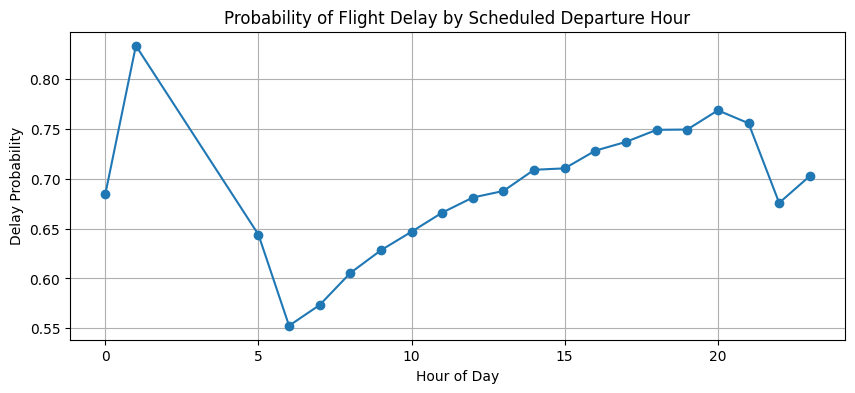

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
hour_delay.plot(kind="line", marker="o")
plt.title("Probability of Flight Delay by Scheduled Departure Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Delay Probability")
plt.grid(True)
plt.show()

## Graficar la probabilidad de retraso por rango de distancia

/tmp/ipython-input-242649635.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_by_distance = df.groupby("distance_bin")["delayed"].mean()


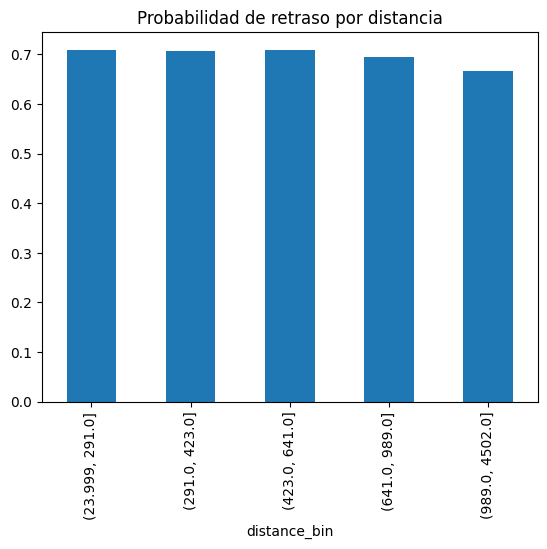

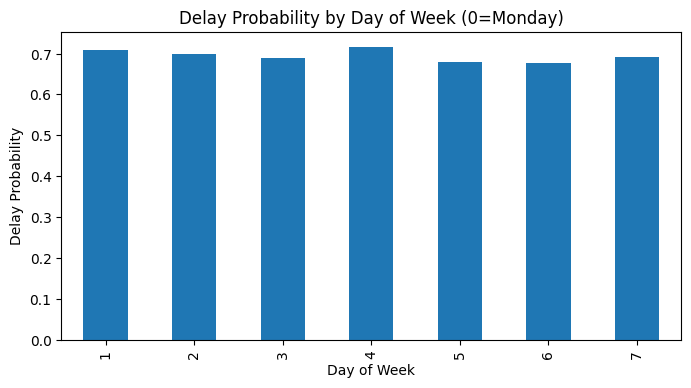

In [8]:
# Crear rangos de distancia (quintiles)
df["distance_bin"] = pd.qcut(df["Distance"], q=5)

# Probabilidad de retraso por rango de distancia
delay_by_distance = df.groupby("distance_bin")["delayed"].mean()


delay_by_distance.plot(kind="bar", title="Probabilidad de retraso por distancia")

#Creo día de la semana

df["day_of_week"] = df["DayOfWeek"]

#Retraso por día de la semana

dow_delay = (
    df.groupby("day_of_week")["delayed"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(8,4))
dow_delay.plot(kind="bar")
plt.title("Delay Probability by Day of Week (0=Monday)")
plt.xlabel("Day of Week")
plt.ylabel("Delay Probability")
plt.show()

## Top 10 aerolíneas

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta correcta al CSV
csv_path = f"{path}/DelayedFlights.csv"

# Cargar solo lo necesario (eficiente)
df = pd.read_csv(
    csv_path,
    usecols=["UniqueCarrier", "DepDelay"]
)

# Crear variable binaria de retraso (>=15 min)
df["delayed"] = (df["DepDelay"] >= 15).astype(int)

# Top 10 aerolíneas con mayor probabilidad de retraso
top10_airlines = (
    df.groupby("UniqueCarrier")["delayed"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

# Mostrar tabla
print(top10_airlines)

UniqueCarrier
OH    0.797596
YV    0.777284
B6    0.743686
EV    0.726834
UA    0.726097
AA    0.725573
MQ    0.722315
XE    0.718366
9E    0.714657
OO    0.685290
Name: delayed, dtype: float64


### Graficar top 10 aerolíneas con mayor probabilidad de retraso

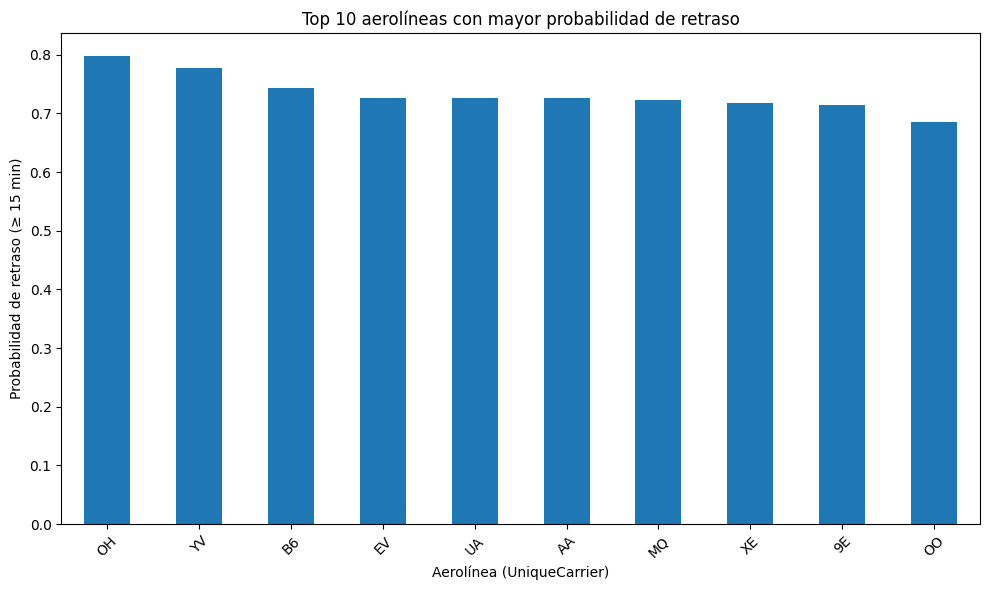

,proportion
delayed,
1,0.685552
0,0.314448


In [10]:
# Gráfica
plt.figure(figsize=(10,6))
top10_airlines.plot(kind="bar")
plt.title("Top 10 aerolíneas con mayor probabilidad de retraso")
plt.xlabel("Aerolínea (UniqueCarrier)")
plt.ylabel("Probabilidad de retraso (≥ 15 min)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df["delayed"].value_counts(normalize=True) #Variable objetiva binaria prueba


## Probabilidad de retraso por hora

In [13]:
import pandas as pd
import numpy as np

# The original 'df' that contained 'hour' was overwritten in cell Y1je0IM9Icwn.
# To calculate probability of delay by hour, we need to ensure 'hour' and 'delayed' columns exist.
# Reload df with necessary columns for 'hour' and 'delayed'
df = pd.read_csv(
    csv_path, # Use the global csv_path defined earlier
    usecols=["CRSDepTime", "DepDelay"],
    nrows=100_000 # Limiting to 100k rows as done in previous relevant cells
)

# Create 'hour' column from CRSDepTime
df["hour"] = df["CRSDepTime"] // 100

# Create 'delayed' binary variable (1 = delay >= 15 min)
df["delayed"] = (df["DepDelay"] >= 15).astype(int)


# Calcular probabilidad de retraso según la hora
hour_delay = df.groupby("hour")["delayed"].mean()

# Este valor mide la variación de la probabilidad de retraso a lo largo del día
variation = hour_delay.max() - hour_delay.min()  # diferencia máxima-minima

# Comentarios explicativos:
# Este criterio mide cuánto cambia la probabilidad de retraso a lo largo del día;
# si la variación es alta, significa que la hora del vuelo influye de forma real
# en los retrasos, y el ratio entre datasets nos permite comparar cuál captura
# mejor ese patrón temporal sin necesidad de entrenar ni optimizar modelos.

print("Probabilidad de retraso por hora:")
print(hour_delay)
print("\nVariación de la probabilidad de retraso a lo largo del día:", variation)

Probabilidad de retraso por hora:
hour
0     0.684211
1     0.833333
5     0.643979
6     0.552562
7     0.573357
8     0.605422
9     0.628251
10    0.646840
11    0.665968
12    0.681133
13    0.687709
14    0.708935
15    0.710356
16    0.728121
17    0.736919
18    0.748999
19    0.749286
20    0.768538
21    0.755598
22    0.675735
23    0.702648
Name: delayed, dtype: float64

Variación de la probabilidad de retraso a lo largo del día: 0.2807716635041113
